## Processo Seletivo: Hacker de Fiscalização e Análise de Dados do Gabinete Compartilhado

### Problema:

Crie um arquivo notebook contendo o código (preferencialmente em Python e com comentários) e uma discussão em texto que respondam ao enunciado abaixo.

"Baseado na tabela em CSV com a série histórica 'Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', disponível no site do Atlas do Estado Brasileiro (IPEA), comente uma ou duas tendências da evolução da remuneração destes servidores de acordo com seu sexo e/ou raça."

### Importando biliotecas necessárias

In [1]:
import os
import csv
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Para corrigir problema com certificado SSL no MacOs
import ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

# Para evitar que os gráficos sejam plotados em uma nova janela
%matplotlib inline

### Carregando dados

In [2]:
# Verifica se arquivo contendo dados exite. 
# Caso não exista, faz download no site do IPEA (https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv)
if os.path.isfile('./data/5233-liquidosexoraca.csv'):
    print('Arquivo já exite')
else:
    print('Download do arquivo')
    data_url = 'https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv'
    df = pd.read_csv(data_url, sep=";", encoding='utf-8')
    df.to_csv('./data/5233-liquidosexoraca.csv', index=False, sep=";")

Download do arquivo


In [3]:
# Carrega dados no dataframe 
df = pd.read_csv('./data/5233-liquidosexoraca.csv', sep=';', usecols=['ano', 'sexo_raça', 'liquido'])
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,"6527,2"
1,1999,Homem Negro,"4768,7"
2,1999,Mulher Branca,"5261,6"
3,1999,Mulher Negra,4010
4,2000,Homem Branco,"5690,3"


### Tratando os dados

In [4]:
# Checando tipo dos dados
df.dtypes

ano           int64
sexo_raça    object
liquido      object
dtype: object

In [5]:
# Tratando dados numéricos
df['liquido'] = df['liquido'].astype(str)
df['liquido'] = df['liquido'].str.replace(',', '.')
df['liquido'] = df['liquido'].astype(float)
df.head()

,ano,sexo_raça,liquido
0,1999,Homem Branco,6527.2
1,1999,Homem Negro,4768.7
2,1999,Mulher Branca,5261.6
3,1999,Mulher Negra,4010.0
4,2000,Homem Branco,5690.3


In [6]:
# Checando se conversão deu certo
df.dtypes

ano            int64
sexo_raça     object
liquido      float64
dtype: object

In [7]:
# Tabela ampla ano x grupo
df_pivot = pd.pivot_table(df, index='ano', values='liquido', columns='sexo_raça')
df_pivot

sexo_raça,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
ano,,,,
1999,6527.2,4768.7,5261.6,4010.0
2000,5690.3,4151.7,4887.3,3782.5
2001,5833.8,4107.2,4997.5,3734.5
2002,6407.0,4489.6,5429.7,4069.7
2003,6133.3,4297.4,5171.9,3856.7
2004,5902.9,4372.2,4963.7,3862.0
2005,6314.4,4558.0,5298.2,4036.4
2006,6227.3,4368.9,5269.9,3958.6
2007,7049.0,4815.0,5822.3,4311.5


### Analisando os dados

#### Comparando evolução de cada categoria

In [8]:
# Taxa de crescimento relativa, em relação ao ano anterior, para cada categoria
# TCR - Taxa de crescimento relativo
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}
df_tcr = pd.DataFrame()

for i in grupos:
    df_tcr[(i + ' TCR')] = df_pivot[i].pct_change().round(2)

# Alterando ordem das colunas
df_tcr = df_tcr[['Homem Branco TCR', 'Homem Negro TCR', 'Mulher Branca TCR', 'Mulher Negra TCR']]

df_tcr

,Homem Branco TCR,Homem Negro TCR,Mulher Branca TCR,Mulher Negra TCR
ano,,,,
1999,NaN,NaN,NaN,NaN
2000,-0.13,-0.13,-0.07,-0.06
2001,0.03,-0.01,0.02,-0.01
2002,0.10,0.09,0.09,0.09
2003,-0.04,-0.04,-0.05,-0.05
2004,-0.04,0.02,-0.04,0.00
2005,0.07,0.04,0.07,0.05
2006,-0.01,-0.04,-0.01,-0.02
2007,0.13,0.10,0.10,0.09


In [9]:
# Taxa de crescimento acumulada para cada categoria
# TCA - Taxa de crescimento acumulada
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}
df_tca = pd.DataFrame()

for i in grupos:
    ind = df_pivot[i].iloc[0]
    df_tca[(i + ' TCA')] = df_pivot[i].apply(lambda x: ((x - ind)/ind)).round(2)

# Alterando ordem das colunas
df_tca = df_tca[['Homem Branco TCA', 'Homem Negro TCA', 'Mulher Branca TCA', 'Mulher Negra TCA']]

df_tca

,Homem Branco TCA,Homem Negro TCA,Mulher Branca TCA,Mulher Negra TCA
ano,,,,
1999,0.00,0.00,0.00,0.00
2000,-0.13,-0.13,-0.07,-0.06
2001,-0.11,-0.14,-0.05,-0.07
2002,-0.02,-0.06,0.03,0.01
2003,-0.06,-0.10,-0.02,-0.04
2004,-0.10,-0.08,-0.06,-0.04
2005,-0.03,-0.04,0.01,0.01
2006,-0.05,-0.08,0.00,-0.01
2007,0.08,0.01,0.11,0.08


In [10]:
# Sumário
for i in grupos:
    sel = df.loc[df['sexo_raça'] == i]
    max_sal = max(sel['liquido'])
    ano_max_sal = sel.loc[sel['liquido'] ==  max_sal, 'ano'].values[0]
    min_sal = min(sel['liquido'])
    ano_min_sal = sel.loc[sel['liquido'] ==  min_sal, 'ano'].values[0]
    var_max_min = round((1 + (max_sal - min_sal)/min_sal), 2)
    sal_99 = sel.loc[sel['ano'] ==  1999, 'liquido'].values[0]
    sal_20 = sel.loc[sel['ano'] ==  2020, 'liquido'].values[0]
    var_99_20 = round((1 + (sal_20 - sal_99)/sal_99), 2)
    mean_sal = np.mean(sel['liquido']).round(decimals = 1)
    print("'" + i + "':")
    print('Menor salário: R$ ' + str(min_sal) + ' (' + str(ano_min_sal) + ')')
    print('Maior salário: R$ ' + str(max_sal) + ' (' + str(ano_max_sal) + ')')
    print('Variação mínimo/máximo: ' + str(var_max_min) + '%')
    print('Salário 1999: R$ ' + str(sal_99) + ' (1999)')
    print('Salário 2020: R$ ' + str(sal_20) + ' (2020)')
    print('Variação 1999/2020: ' + str(var_99_20) + '%')
    print('Salário médio: R$ ' + str(mean_sal) + '\n')


'Mulher Branca':
Menor salário: R$ 4887.3 (2000)
Maior salário: R$ 8321.2 (2014)
Variação mínimo/máximo: 1.7%
Salário 1999: R$ 5261.6 (1999)
Salário 2020: R$ 7753.8 (2020)
Variação 1999/2020: 1.47%
Salário médio: R$ 6718.9

'Homem Branco':
Menor salário: R$ 5690.3 (2000)
Maior salário: R$ 9279.1 (2014)
Variação mínimo/máximo: 1.63%
Salário 1999: R$ 6527.2 (1999)
Salário 2020: R$ 8774.2 (2020)
Variação 1999/2020: 1.34%
Salário médio: R$ 7738.2

'Homem Negro':
Menor salário: R$ 4107.2 (2001)
Maior salário: R$ 6591.9 (2017)
Variação mínimo/máximo: 1.6%
Salário 1999: R$ 4768.7 (1999)
Salário 2020: R$ 6272.2 (2020)
Variação 1999/2020: 1.32%
Salário médio: R$ 5460.0

'Mulher Negra':
Menor salário: R$ 3734.5 (2001)
Maior salário: R$ 6335.1 (2014)
Variação mínimo/máximo: 1.7%
Salário 1999: R$ 4010.0 (1999)
Salário 2020: R$ 5815.5 (2020)
Variação 1999/2020: 1.45%
Salário médio: R$ 5066.8



#### Comparando outras categorias com Homem Branco

In [11]:
# Comparando todos os salários com o primeiro salário do Homem Branco 
# Diz algo?????? Sim! Salário da Mulher Negra nunca ultrapassou o salário do HB de 99. Salário do Homem Negro, apenas em 2017 e 2014.
# Já a Mulher Branca, apenas em 2009 (10 anos!), passou a ganhar mais que o HB de 99.
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}
df_hb_99 = pd.DataFrame()

index = df_pivot['Homem Branco'].iloc[0]
for i in grupos:
    df_hb_99[i + " x HB 99"] = df_pivot[i].apply(lambda x: x/index).round(2)

# Alterando ordem das colunas
df_hb_99 = df_hb_99[['Homem Branco x HB 99', 'Homem Negro x HB 99', 'Mulher Branca x HB 99', 'Mulher Negra x HB 99']]

# Exporta para csv para utilizar na análise dos dados 
df_hb_99.to_csv('./output/df_hb_99.csv')

df_hb_99

,Homem Branco x HB 99,Homem Negro x HB 99,Mulher Branca x HB 99,Mulher Negra x HB 99
ano,,,,
1999,1.00,0.73,0.81,0.61
2000,0.87,0.64,0.75,0.58
2001,0.89,0.63,0.77,0.57
2002,0.98,0.69,0.83,0.62
2003,0.94,0.66,0.79,0.59
2004,0.90,0.67,0.76,0.59
2005,0.97,0.70,0.81,0.62
2006,0.95,0.67,0.81,0.61
2007,1.08,0.74,0.89,0.66


In [12]:
# Comparando o salário de determinado ano em cada categoria com o salário do Homem Branco no mesmo ano

grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}
df_hb_all = pd.DataFrame()

for i in grupos:
    lista = []
    for row in range(len(df_pivot)):
        index = df_pivot['Homem Branco'].iloc[row]
        n = df_pivot[i].iloc[row]
        valor = (n/index).round(2)
        lista.append(valor)
    df_hb_all[(i + " x HB 20")] = lista

df_hb_all['ano'] = df_pivot.index
df_hb_all.set_index('ano', inplace=True)

# Alterando ordem das colunas
df_hb_all = df_hb_all[['Homem Branco x HB 20', 'Homem Negro x HB 20', 'Mulher Branca x HB 20', 'Mulher Negra x HB 20']]

df_hb_all

,Homem Branco x HB 20,Homem Negro x HB 20,Mulher Branca x HB 20,Mulher Negra x HB 20
ano,,,,
1999,1.0,0.73,0.81,0.61
2000,1.0,0.73,0.86,0.66
2001,1.0,0.70,0.86,0.64
2002,1.0,0.70,0.85,0.64
2003,1.0,0.70,0.84,0.63
2004,1.0,0.74,0.84,0.65
2005,1.0,0.72,0.84,0.64
2006,1.0,0.70,0.85,0.64
2007,1.0,0.68,0.83,0.61


### Plotando gráficos

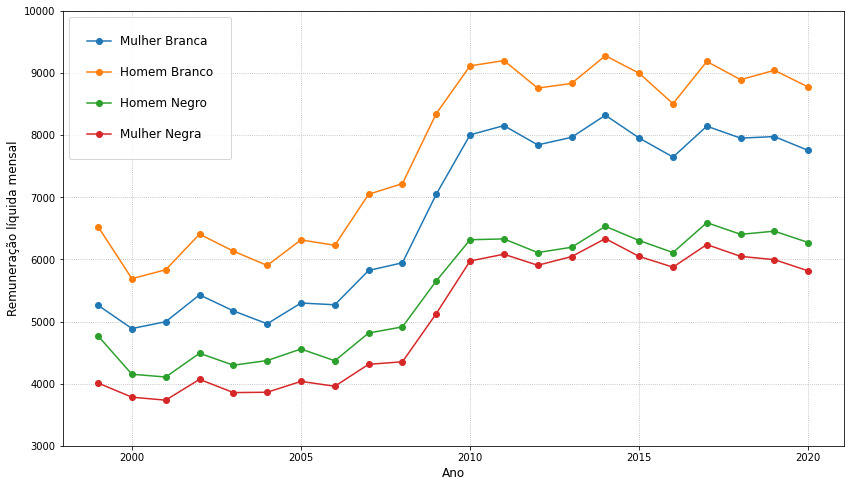

In [13]:
# Gráfico 1 contendo a remuneração líquida média mensal por ano e por categoria 
fig1, ax1 = plt.subplots(figsize=(14,8))
# plt.suptitle('Gráfico 1 - Remuneração líquida média mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)', size=18)
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}

for i in grupos:
    sel = df.loc[df['sexo_raça'] == i]
    x = sel['ano']
    y = sel['liquido']
    plt.plot(x,y, label=i, marker='o')
plt.legend(fontsize=12, borderpad=1.5, labelspacing=1.5)
plt.grid(True, linestyle=':')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Remuneração líquida mensal', fontsize=12)
plt.ylim(3000,10000)

# Gráfico será usada no relatório
plt.savefig('./output/grafico1.png')

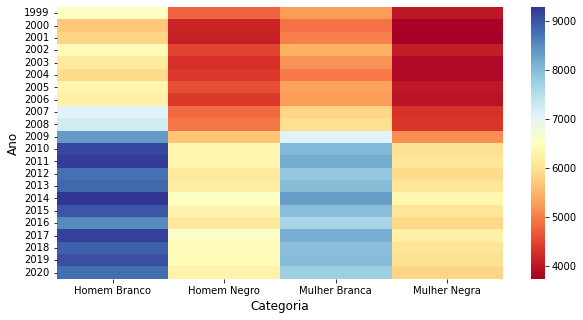

In [14]:
# Gráfico 2 - Mapa de calor mostra visualmente as diferenças nos valores salariais por categoria
# Azul representa valores maior, amarelo, valores médios e vermelho, valores baixos.
plt.figure(figsize=(10,5))
# plt.suptitle('Gráfico 2 - Mapa de calor da remuneração média mensal, por ano e por categoria', size=15)
sns.heatmap(data=df_pivot[['Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra']], cmap = "RdYlBu")
plt.ylabel('Ano', fontsize=12)
plt.xlabel('Categoria', fontsize=12)

# Gráfico será usada no relatório
plt.savefig('./output/grafico2.png')

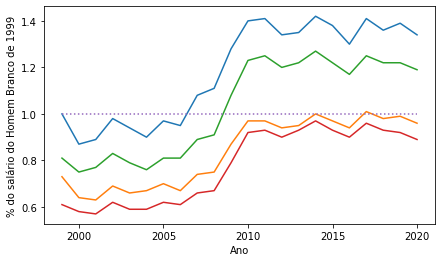

In [15]:
# Gráfico 3 - Compara todos os salários com Homem Branco de 99
fig4, ax4 = plt.subplots(figsize=(7,4))
plt.plot(df_hb_99) 

# Coloca uma reta no valor y = 1
arr2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
years = np.arange(1999,2021)
plt.plot(years,arr2, ':')
plt.ylabel('% do salário do Homem Branco de 1999')
plt.xlabel('Ano')

# Gráfico será usada no relatório
plt.savefig('./output/grafico3.png')

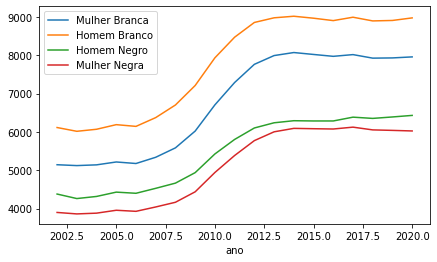

In [16]:
# Verificar tendência suavizada com média móvel de 4 períodos.
# Diz algo? Sim. Notam-se dois platôs 
# Gráfico apenas informativo, não foi incorporado à análise textual
fig2, ax2 = plt.subplots(figsize=(7,4))
grupos = {'Homem Branco', 'Homem Negro', 'Mulher Branca', 'Mulher Negra'}

for i in grupos:
    df_pivot[i].rolling(4).mean().plot()
plt.legend()


Text(0, 0.5, '% do salário do HB em cada ano')

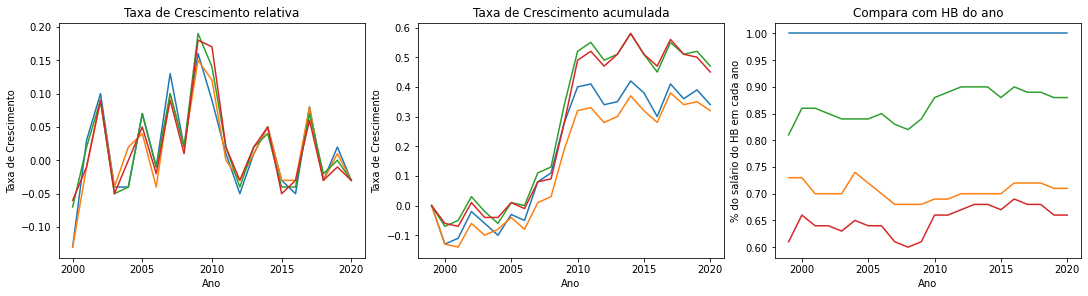

In [17]:
# Verificando evolução das taxas de crescimento
# Gráficos apenas informativos, não foram incorporados à análise textual

fig3, f3_axes = plt.subplots(ncols = 3, constrained_layout=True, figsize=(15,4))

# taxa de crescimento relativa
f3_axes[0].plot(df_tcr) 
f3_axes[0].set_title('Taxa de Crescimento relativa')
f3_axes[0].set_xlabel('Ano')
f3_axes[0].set_ylabel('Taxa de Crescimento')
f3_axes[0].set_xticks([2000,2005,2010,2015,2020])

# taxa de crescimento acumulada
f3_axes[1].plot(df_tca) 
f3_axes[1].set_title('Taxa de Crescimento acumulada')
f3_axes[1].set_xlabel('Ano')
f3_axes[1].set_ylabel('Taxa de Crescimento')

# compara o salário da categoria no ano com o salário do HB do mesmo ano
f3_axes[2].plot(df_hb_all)
f3_axes[2].set_title('Compara com HB do ano')
f3_axes[2].set_xlabel('Ano')
f3_axes[2].set_ylabel('% do salário do HB em cada ano')
